## What does "learning" means in Machine Learning?

* Learning (or also training) = updating parameters (weights $w$ and bias $b$) with the aim to reduce the cost (or error), given by the cost function $J(\vec{w},b)$.
* Most of the time this is done using Gradient descent (or other optimizing algorithms such as Adam).
* At each training step, we compute the gradient of the cost function with respect to each parameter: $\frac{d}{dw} J(w,b)$ and $\frac{d}{db} J(w,b)$
* These gradients tell us:
* * Direction: which way to move to reduce loss
* * Magnitude: how big a step to take (based on learning rate $\alpha$
* So if the gradients are large enough but not too large, the model learns quickly (makes meaningful updates).
* If gradients are tiny, the updates are tiny → learning is slower.


## Checking Gradient descent for convergence

 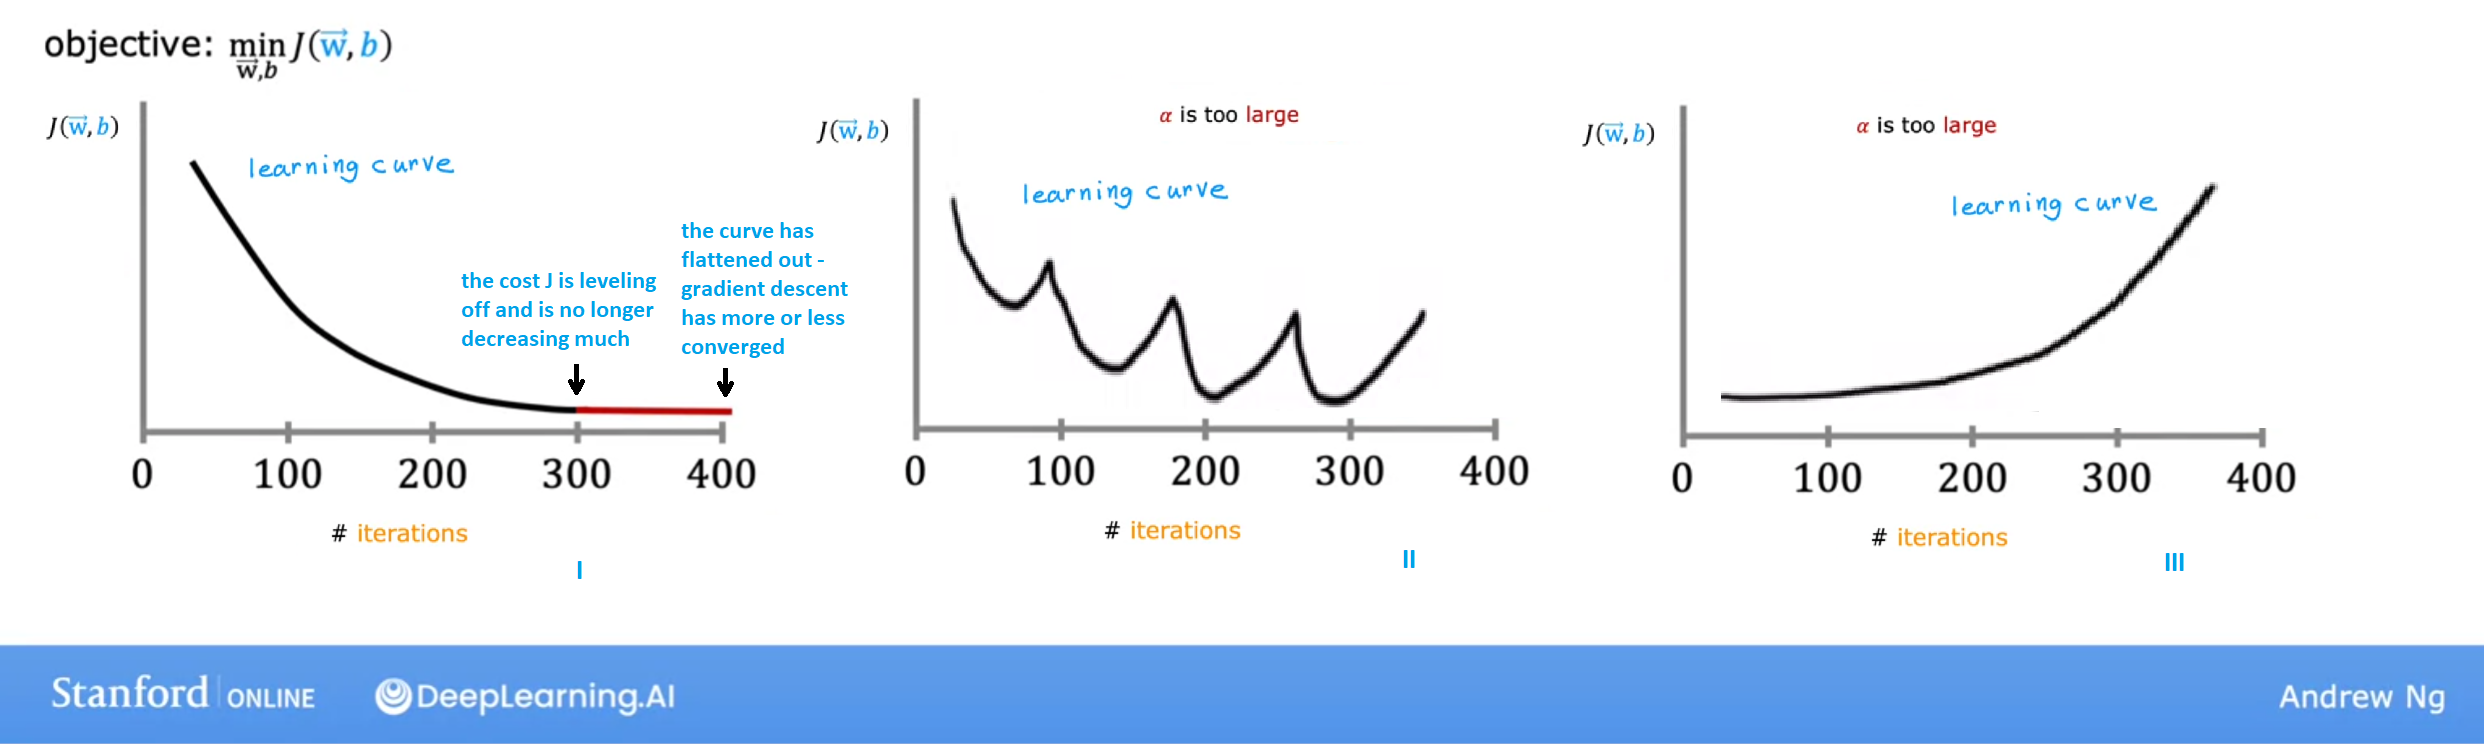
* To <b>converge</b> means to find such parameters $\vec{w}, b$ that minimize to cost function $J(\vec{w},b)$ - i.e. to find the parameters close to its global minimum.
* Remember that at each iteration the parameters $\vec{w}$ and $b$ are simultaneously updated.
* If the algorithm is working properly, than cost $J$ must decrease at every single iteration. 
* If $J$ is leveling off and is no longer decreasing much - this means that gradient descent has more or less converged.
* If this is not the case &rarr; ie. the loss $J$ only increases instead of diminishing, or is fluctuating (sometimes going up, sometimes going down) - that usually means $\alpha$ is too large (causing overshooting of the minimum), or there could be a bug in the code.
* The number of iterations that gradient descent takes to converge can vary a lot between different applications (30, or 1000, or even 100000 iterations).
* Decide when to stop training with an automatic convergence test:
* * Let $\epsilon = 10^{-3}$ or some similar very small number.
* * If $J$ decreases by less than $\epsilon$ on one iteration, then you're likely on the flattened part of the curve and can declare convergence.


## Learning rate $\alpha$ and Gradient descend 

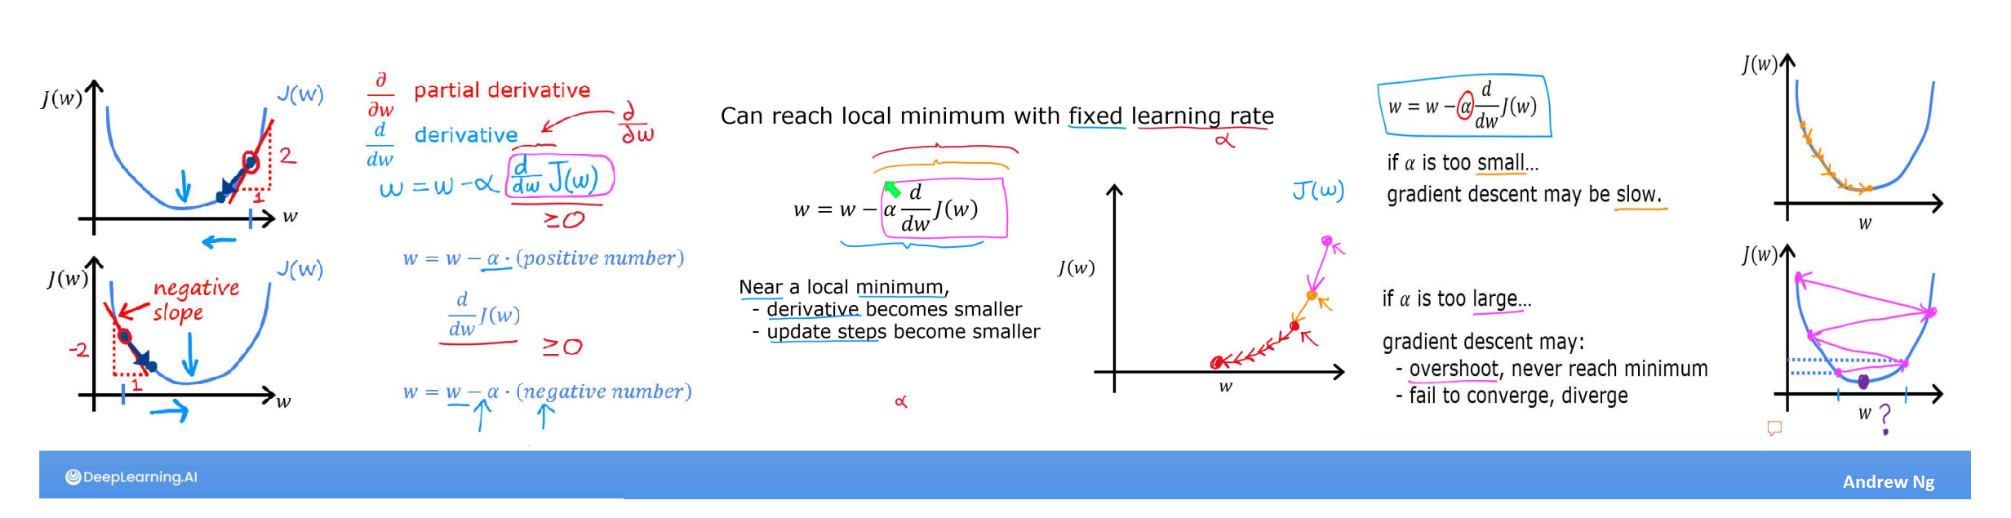
Fig. Progress of $w$ over the steps of Gradient descent. If $w$ oscilates from positive to negative, the cost grows rapidly. <br> 
Note: Gradient descent is operating on both $w$ and $b$ simultaneously, so one needs a 3D-plot (cost x b x w) for the complete picture.

* When the slope of the partial derivative $ \frac{d}{db} J(w,b) $ is a positive number, it means that the cost function $J(w,b)$ increases as $w$ increases. Since $\alpha$ is also a positive number - GD will decrease $w$ as a result, updating its value in the opposite direction of the gradient, which is to the left on the graph of $J(w,b)$. 
* When the slope is negative, it means that the cost function $J(w,b)$ decreases as $w$ increases. As a result GD will increase $w$, moving to the to the right on the graph of $J(w,b)$.
* The larger $\alpha$ is, the faster GD will converge to a solution. But if $\alpha$ is chosen poorly - GD may not converge at all.
* * If $\alpha$ is too small - the "learning" speed is too slow as we take lots and lots of steps.
* * If $\alpha$ is too big - GD may overshoot (fail to converge) and not find any minimum.
* If the cost is increasing with each iteration, rather than decreasing - this is a clear sign that $\alpha$ is too large and the solution is diverging.
* What to do if we have found a local minima that is not the best solution (not a global minima)?
* * But change the fixed learning rate, based on how large is the partial derivative term at the point we are at.
* * If it's large enough, then chose a bigger $\alpha$, otherwise chose smaller one.


## How to chose approprriate learning rate 

* If $\alpha$ is too small - the algorithm will run very slowly.
* If $\alpha$ is too large - it may not even converge.
* If the cost $J$ sometimes goes up instead of decreasing - learning rate is too big and the update step may be overshooting the minimum &rarr; try a smaller learning rate $\alpha$
* How to debug if gradient descent isn't working:
* * Try setting $\alpha$ to a very small number and see if that causes the cost to decrease on every iteration.
* * If even with very small $\alpha$ $J$ doesn't decrease on every single iteration, but instead sometimes increases, then that usually means there's a bug somewhere in the code.
* * Note that setting $\alpha$ to be really small is meant only for debugging purposes and is not going to be the most efficient choice for actual training, as the gradient descents will take a lot of iterations to converge.
* How to chose best $\alpha$:
* * Try a range of values for the learning, with each $\alpha$ being roughly 3 times bigger than the previous one: starting by 0.001 &rarr; 0.003 &rarr; 0.01 &rarr; 0.03 ...  
* * For each choice of $\alpha$, run gradient descent just for a handful of iterations and plot the cost function $J$ as a function of the number of iterations
* * Pick the value of $\alpha$ that seems to decrease the cost rapidly, but also consistently - this usually is just something slightly smaller than the largest reasonable value found.


## What to avoid during learning (training)
 
* Vanishing Gradients (Too Small) ⇒ also alled "saturation"
  * Gradients vanish (approach zero)
  * Weights barely update
  * Learning stalls or stops
* Exploding Gradients (Too Big)
  * Weights are initialized with very large values, or the model has many layers (especially in deep networks), causing derivatives to compound and grow during backpropagation
  * Gradients become enormous
  * Weight updates shoot off wildly
  * Cost becomes NaN or oscillates uncontrollably
  * Learning diverges